In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import random
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn import pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif, chi2, SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix, classification_report, silhouette_score, f1_score, precision_recall_curve, plot_precision_recall_curve, average_precision_score, auc
from sklearn.svm import SVR, LinearSVR, SVC, LinearSVC
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from scipy import stats
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix

#### Perpare Data

In [4]:
df_village = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/final_combined_without_temporal_correction_arch2_predicted_ADI_for_2001_2019_ground_truth_ADI_2011_variables_predicted_from_arch2_pop_sc_st_lit_village_data.pkl','rb'))

In [5]:
df_village

,2001_cc_code,VILL_CODE_2001,DIST_CODE_2001,STATE_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2011,distance_district_centre,dc_score_none_none_old,inverted_dist,...,FC_2011,ASSET_2011,LIT_2011,MSW_2011,BF_2019,FC_2019,MSW_2019,ASSET_2019,LIT_2019,ADI_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,00000500,1,3,27378,35,3,6.111495,0.407427,0.163626,...,1,3,3,3,1,3,3,3,3,13
27379,301000100000600,00000600,1,3,27379,35,3,4.878376,0.658831,0.204986,...,1,3,3,3,1,3,3,3,3,13
27380,301000100000700,00000700,1,3,27380,35,3,9.103092,0.080571,0.109853,...,1,3,3,3,1,3,3,3,3,13
27381,301000100000800,00000800,1,3,27381,35,3,6.777262,0.309724,0.147552,...,1,3,3,3,1,1,3,3,3,11
27382,301000100000900,00000900,1,3,27382,35,3,6.786058,0.308561,0.147361,...,1,3,3,3,1,3,3,3,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3310000700779700,00779700,10,33,644661,633,33,2.643310,1.712385,0.378314,...,3,3,3,3,3,3,3,3,2,14
644682,3310000700781800,00781800,10,33,644682,633,33,2.493440,1.850601,0.401052,...,3,3,3,3,1,3,3,3,2,12
644683,3310000700781900,00781900,10,33,644683,633,33,3.325585,1.240612,0.300699,...,3,3,3,3,3,3,3,3,2,14


In [6]:
df_village[['STATE_CODE_2001','STATE_CODE_2011']]

,STATE_CODE_2001,STATE_CODE_2011
index_col_village_code_2011,,
27378,3,3
27379,3,3
27380,3,3
27381,3,3
27382,3,3
...,...,...
644661,33,33
644682,33,33
644683,33,33


In [7]:
!pip install pyreadstat
import pyreadstat
census_data_2001 , meta = pyreadstat.read_dta('/content/drive/MyDrive/Satellite-Project-Village-level/2001IndiaCensus/India_villdir.dta')

     |████████████████████████████████| 2.4 MB 8.2 MB/s 


In [8]:
#census_daa_2001_statewise = census_data_2001.groupby('ST_CODE')
#census_daa_2001_statewise.first()
census_data_2001[['ST_CODE','state_ut']].value_counts()
#census_data_2001[['ST_CODE','state_ut']]

ST_CODE  state_ut         
09       Uttar Pradesh        97942
23       Madhya Pradesh       52117
21       Orissa               47529
27       Maharashtra          41095
08       Rajasthan            39753
10       Bihar                38471
19       West Bengal          37946
29       Karnataka            27481
28       Andhra Pradesh       26613
18       Assam                25124
20       Jharkhand            23226
22       Jatawar              19744
24       Gujarat              18066
02       Himachal Pradesh     17495
05       Uttrakhand           15761
33       Tamilnadu            15400
03       Punjab               10796
06       Haryana               6764
01       Jammu & Kashmir       5924
17       Meghalaya             5782
12       Arunachal Pradesh     3863
14       Manipur               2199
32       Kerala                1364
13       Nagaland              1278
16       Tripura                858
15       Mizoram                707
35       Andaman                501
1

In [9]:
states = ['PB',
'HR',
'RJ',
'UP',
'BR',
'JH',
'OR',
'CG',
'MP',
'GJ',
'MH',
'AP',
'KA',
'TN',
'UT',
'SK',
'AS',
'MZ',
'TR',
'KL'];

state_ids = [3,
6,
8,
9,
10,
20,
21,
22,
23,
24,
27,
28,
29,
33,
5,
11,
18,
15,
16,
32]

In [10]:
data = {'state_id' : state_ids , 'state_name' : states };

In [11]:
state_df = pd.DataFrame(data)

In [12]:
state_df

,state_id,state_name
0,3,PB
1,6,HR
2,8,RJ
3,9,UP
4,10,BR
5,20,JH
6,21,OR
7,22,CG
8,23,MP
9,24,GJ


In [13]:
df_village[df_village['STATE_CODE_2001']==df_village['STATE_CODE_2001']]

,2001_cc_code,VILL_CODE_2001,DIST_CODE_2001,STATE_CODE_2001,VILL_CODE_2011,DIST_CODE_2011,STATE_CODE_2011,distance_district_centre,dc_score_none_none_old,inverted_dist,...,FC_2011,ASSET_2011,LIT_2011,MSW_2011,BF_2019,FC_2019,MSW_2019,ASSET_2019,LIT_2019,ADI_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,00000500,1,3,27378,35,3,6.111495,0.407427,0.163626,...,1,3,3,3,1,3,3,3,3,13
27379,301000100000600,00000600,1,3,27379,35,3,4.878376,0.658831,0.204986,...,1,3,3,3,1,3,3,3,3,13
27380,301000100000700,00000700,1,3,27380,35,3,9.103092,0.080571,0.109853,...,1,3,3,3,1,3,3,3,3,13
27381,301000100000800,00000800,1,3,27381,35,3,6.777262,0.309724,0.147552,...,1,3,3,3,1,1,3,3,3,11
27382,301000100000900,00000900,1,3,27382,35,3,6.786058,0.308561,0.147361,...,1,3,3,3,1,3,3,3,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3310000700779700,00779700,10,33,644661,633,33,2.643310,1.712385,0.378314,...,3,3,3,3,3,3,3,3,2,14
644682,3310000700781800,00781800,10,33,644682,633,33,2.493440,1.850601,0.401052,...,3,3,3,3,1,3,3,3,2,12
644683,3310000700781900,00781900,10,33,644683,633,33,3.325585,1.240612,0.300699,...,3,3,3,3,3,3,3,3,2,14


In [14]:
df_district = pickle.load(open('/content/drive/MyDrive/Scripts_and_Data_Transfer/Latest_script_Data_for_hyothesis_testing_March_02_2022/combined_gini_2001_2011_2019_from_without_temporal_arch2_predicted_data.pickle','rb'))

In [15]:
df_district

Gini_2001  Population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                   
3.0             35.0             0.081987            1190370.0   
                37.0             0.049305             909528.0   
                38.0             0.067285            1084402.0   
                39.0             0.092315             459081.0   
                40.0             0.128257             320338.0   
...                                   ...                  ...   
33.0            627.0            0.000000                290.0   
                630.0            0.039200              85383.0   
                631.0            0.045161             448668.0   
                632.0            0.042210              46228.0   
                633.0            0.045931              43087.0   

                                Adi_product_population_sum_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                 15207334.0   
                37.0                                 12677151.0   
                38.0                                 14958808.0   
                39.0                                  6063192.0   
                40.0                                  3375632.0   
...                                                         ...   
33.0            627.0                                    2610.0   
                630.0                                  790016.0   
                631.0                                 4225355.0   
                632.0                                  656521.0   
                633.0                                  454368.0   

                                Average_ADI_per_population_2001  \
STATE_CODE_2011 DIST_CODE_2011                                    
3.0             35.0                                  12.775300   
                37.0                                  13.938165   
                38.0                                  13.794523   
                39.0                                  13.207238   
                40.0                                  10.537720   
...                                                         ...   
33.0            627.0                                  9.000000   
                630.0                                  9.252615   
                631.0                                  9.417554   
                632.0                                 14.201804   
                633.0                                 10.545362   

                                Num_villages_in_District_2001  Gini_2011  \
STATE_CODE_2011 DIST_CODE_2011                                             
3.0             35.0                                   1223.0   0.047189   
                37.0                                    829.0   0.034979   
                38.0                                   1233.0   0.039400   
                39.0                                    417.0   0.035722   
                40.0                                    355.0   0.029908   
...                                                       ...        ...   
33.0            627.0                                     1.0   0.000000   
                630.0                                    61.0   0.072128   
                631.0                                   240.0   0.079975   
                632.0                                    10.0   0.038716   
                633.0                                    19.0   0.050380   

                                Population_sum_2011  \
STATE_CODE_2011 DIST_CODE_2011                        
3.0             35.0                      1320850.0   
                37.0                       943005.0   
                38.0                      1147816.0   
                39.0                       459948.0   
                40.0                       342391.0   
...                                             ...   


In [16]:
df_village_filter = df_village[['2001_cc_code','STATE_CODE_2011','DIST_CODE_2011','VILL_CODE_2011','ADI_2001','ADI_2011','ADI_2019','distance_district_centre','LIT_2001','MSW_2001','LIT_2011','MSW_2011','LIT_2019','MSW_2019','P_ST_2011','P_SC_2011','P_SC_2001','P_ST_2001','total_population_2001','total_population_2011','total_population_2019']]

In [17]:
df_village_filter

,2001_cc_code,STATE_CODE_2011,DIST_CODE_2011,VILL_CODE_2011,ADI_2001,ADI_2011,ADI_2019,distance_district_centre,LIT_2001,MSW_2001,...,MSW_2011,LIT_2019,MSW_2019,P_ST_2011,P_SC_2011,P_SC_2001,P_ST_2001,total_population_2001,total_population_2011,total_population_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,3,35,27378,7,11,13,6.111495,2,1,...,3,3,3,0,321,261,0,766.0,852.0,947.0
27379,301000100000600,3,35,27379,7,11,13,4.878376,2,1,...,3,3,3,0,127,100,0,730.0,780.0,833.0
27380,301000100000700,3,35,27380,7,11,13,9.103092,2,1,...,3,3,3,0,1129,905,0,2104.0,2502.0,2975.0
27381,301000100000800,3,35,27381,7,11,11,6.777262,2,1,...,3,3,3,0,239,749,0,3014.0,1887.0,1181.0
27382,301000100000900,3,35,27382,7,11,13,6.786058,2,1,...,3,3,3,0,637,67,0,461.0,2233.0,10816.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3310000700779700,33,633,644661,10,13,14,2.643310,2,3,...,3,2,3,0,288,178,0,1365.0,1291.0,1221.0
644682,3310000700781800,33,633,644682,9,15,12,2.493440,2,3,...,3,2,3,4,1526,474,0,2054.0,8089.0,31855.0
644683,3310000700781900,33,633,644683,10,15,14,3.325585,2,3,...,3,2,3,0,1368,1065,0,2388.0,3992.0,6673.0


In [18]:
df_district_filter = df_district[['Gini_2001','Gini_2011','Gini_2019','Average_ADI_per_population_2001','Average_ADI_per_population_2011','Average_ADI_per_population_2019']]

In [19]:
df_merged_village_district = df_village_filter.merge(df_district_filter,how='inner',left_on=['STATE_CODE_2011','DIST_CODE_2011'],right_index=True).set_index(df_village_filter.index)

In [20]:
df_merged_village_district

,2001_cc_code,STATE_CODE_2011,DIST_CODE_2011,VILL_CODE_2011,ADI_2001,ADI_2011,ADI_2019,distance_district_centre,LIT_2001,MSW_2001,...,P_ST_2001,total_population_2001,total_population_2011,total_population_2019,Gini_2001,Gini_2011,Gini_2019,Average_ADI_per_population_2001,Average_ADI_per_population_2011,Average_ADI_per_population_2019
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,3,35,27378,7,11,13,6.111495,2,1,...,0,766.0,852.0,947.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174
27379,301000100000600,3,35,27379,7,11,13,4.878376,2,1,...,0,730.0,780.0,833.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174
27380,301000100000700,3,35,27380,7,11,13,9.103092,2,1,...,0,2104.0,2502.0,2975.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174
27381,301000100000800,3,35,27381,7,11,11,6.777262,2,1,...,0,3014.0,1887.0,1181.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174
27382,301000100000900,3,35,27382,7,11,13,6.786058,2,1,...,0,461.0,2233.0,10816.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3310000700779700,33,633,644661,10,13,14,2.643310,2,3,...,0,1365.0,1291.0,1221.0,0.045931,0.050380,0.054511,10.545362,13.671448,12.317611
644682,3310000700781800,33,633,644682,9,15,12,2.493440,2,3,...,0,2054.0,8089.0,31855.0,0.045931,0.050380,0.054511,10.545362,13.671448,12.317611
644683,3310000700781900,33,633,644683,10,15,14,3.325585,2,3,...,0,2388.0,3992.0,6673.0,0.045931,0.050380,0.054511,10.545362,13.671448,12.317611


In [21]:
df_merged_village_district = df_merged_village_district.merge(state_df,how='inner',left_on=['STATE_CODE_2011'], right_on=['state_id']).set_index(df_merged_village_district.index)

In [22]:
df_merged_village_district

,2001_cc_code,STATE_CODE_2011,DIST_CODE_2011,VILL_CODE_2011,ADI_2001,ADI_2011,ADI_2019,distance_district_centre,LIT_2001,MSW_2001,...,total_population_2011,total_population_2019,Gini_2001,Gini_2011,Gini_2019,Average_ADI_per_population_2001,Average_ADI_per_population_2011,Average_ADI_per_population_2019,state_id,state_name
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,3,35,27378,7,11,13,6.111495,2,1,...,852.0,947.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174,3,PB
27379,301000100000600,3,35,27379,7,11,13,4.878376,2,1,...,780.0,833.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174,3,PB
27380,301000100000700,3,35,27380,7,11,13,9.103092,2,1,...,2502.0,2975.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174,3,PB
27381,301000100000800,3,35,27381,7,11,11,6.777262,2,1,...,1887.0,1181.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174,3,PB
27382,301000100000900,3,35,27382,7,11,13,6.786058,2,1,...,2233.0,10816.0,0.081987,0.047189,0.047450,12.775300,13.081624,12.477174,3,PB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3310000700779700,33,633,644661,10,13,14,2.643310,2,3,...,1291.0,1221.0,0.045931,0.050380,0.054511,10.545362,13.671448,12.317611,33,TN
644682,3310000700781800,33,633,644682,9,15,12,2.493440,2,3,...,8089.0,31855.0,0.045931,0.050380,0.054511,10.545362,13.671448,12.317611,33,TN
644683,3310000700781900,33,633,644683,10,15,14,3.325585,2,3,...,3992.0,6673.0,0.045931,0.050380,0.054511,10.545362,13.671448,12.317611,33,TN


In [23]:
del df_merged_village_district['state_id']

In [24]:
df_merged_village_district['Change_in_ADI_2001_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_ADI_2001_2011'] = df_merged_village_district['ADI_2001']
df_merged_village_district['Initial_LIT_2001_2011'] = df_merged_village_district['LIT_2001']
df_merged_village_district['Initial_MSW_2001_2011'] = df_merged_village_district['MSW_2001']
df_merged_village_district['Final_ADI_2001_2011'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_Gini_District_2001_2011'] = df_merged_village_district['Gini_2001'] 



df_merged_village_district['Village_ADI_District_ADI_Diff_2001'] = df_merged_village_district['ADI_2001'] - df_merged_village_district['Average_ADI_per_population_2001'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2011'] = df_merged_village_district['ADI_2011'] - df_merged_village_district['Average_ADI_per_population_2011'] 
df_merged_village_district['Village_ADI_District_ADI_Diff_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['Average_ADI_per_population_2019'] 

df_merged_village_district['Change_in_ADI_2011_2019'] = df_merged_village_district['ADI_2019'] - df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_ADI_2011_2019'] = df_merged_village_district['ADI_2011']
df_merged_village_district['Initial_LIT_2011_2019'] = df_merged_village_district['LIT_2011']
df_merged_village_district['Initial_MSW_2011_2019'] = df_merged_village_district['MSW_2011']
df_merged_village_district['Final_ADI_2011_2019'] = df_merged_village_district['ADI_2019']
df_merged_village_district['Initial_Gini_District_2011_2019'] = df_merged_village_district['Gini_2011']



In [25]:
unit_col_name='state_name'


#Create the dummy variables, one for each state
df_dummies = pd.get_dummies(df_merged_village_district[unit_col_name])

In [26]:
df_dummies

,AP,BR,CG,GJ,HR,JH,KA,MH,MP,OR,PB,RJ,TN,UP
index_col_village_code_2011,,,,,,,,,,,,,,
27378,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27379,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27380,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27381,0,0,0,0,0,0,0,0,0,0,1,0,0,0
27382,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,0,0,0,0,0,0,0,0,0,0,0,0,1,0
644682,0,0,0,0,0,0,0,0,0,0,0,0,1,0
644683,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [27]:
df_merged_village_district_with_dummies = df_merged_village_district.join(df_dummies)


In [28]:
df_merged_village_district_with_dummies

,2001_cc_code,STATE_CODE_2011,DIST_CODE_2011,VILL_CODE_2011,ADI_2001,ADI_2011,ADI_2019,distance_district_centre,LIT_2001,MSW_2001,...,HR,JH,KA,MH,MP,OR,PB,RJ,TN,UP
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,301000100000500,3,35,27378,7,11,13,6.111495,2,1,...,0,0,0,0,0,0,1,0,0,0
27379,301000100000600,3,35,27379,7,11,13,4.878376,2,1,...,0,0,0,0,0,0,1,0,0,0
27380,301000100000700,3,35,27380,7,11,13,9.103092,2,1,...,0,0,0,0,0,0,1,0,0,0
27381,301000100000800,3,35,27381,7,11,11,6.777262,2,1,...,0,0,0,0,0,0,1,0,0,0
27382,301000100000900,3,35,27382,7,11,13,6.786058,2,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3310000700779700,33,633,644661,10,13,14,2.643310,2,3,...,0,0,0,0,0,0,0,0,1,0
644682,3310000700781800,33,633,644682,9,15,12,2.493440,2,3,...,0,0,0,0,0,0,0,0,1,0
644683,3310000700781900,33,633,644683,10,15,14,3.325585,2,3,...,0,0,0,0,0,0,0,0,1,0


In [29]:
df_merged_village_district_with_dummies.columns

Index(['2001_cc_code', 'STATE_CODE_2011', 'DIST_CODE_2011', 'VILL_CODE_2011',
       'ADI_2001', 'ADI_2011', 'ADI_2019', 'distance_district_centre',
       'LIT_2001', 'MSW_2001', 'LIT_2011', 'MSW_2011', 'LIT_2019', 'MSW_2019',
       'P_ST_2011', 'P_SC_2011', 'P_SC_2001', 'P_ST_2001',
       'total_population_2001', 'total_population_2011',
       'total_population_2019', 'Gini_2001', 'Gini_2011', 'Gini_2019',
       'Average_ADI_per_population_2001', 'Average_ADI_per_population_2011',
       'Average_ADI_per_population_2019', 'state_name',
       'Change_in_ADI_2001_2011', 'Initial_ADI_2001_2011',
       'Initial_LIT_2001_2011', 'Initial_MSW_2001_2011', 'Final_ADI_2001_2011',
       'Initial_Gini_District_2001_2011', 'Village_ADI_District_ADI_Diff_2001',
       'Village_ADI_District_ADI_Diff_2011',
       'Village_ADI_District_ADI_Diff_2019', 'Change_in_ADI_2011_2019',
       'Initial_ADI_2011_2019', 'Initial_LIT_2011_2019',
       'Initial_MSW_2011_2019', 'Final_ADI_2011_2019',
    

In [30]:
df_vil_dist_1 = df_merged_village_district_with_dummies[['ADI_2001','ADI_2011','ADI_2019','distance_district_centre','Gini_2001','Gini_2011','Gini_2019','Village_ADI_District_ADI_Diff_2001','Village_ADI_District_ADI_Diff_2011','Village_ADI_District_ADI_Diff_2019','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [31]:
df_vil_dist_1

,ADI_2001,ADI_2011,ADI_2019,distance_district_centre,Gini_2001,Gini_2011,Gini_2019,Village_ADI_District_ADI_Diff_2001,Village_ADI_District_ADI_Diff_2011,Village_ADI_District_ADI_Diff_2019,...,HR,JH,KA,MH,MP,OR,PB,RJ,TN,UP
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,7,11,13,6.111495,0.081987,0.047189,0.047450,-5.775300,-2.081624,0.522826,...,0,0,0,0,0,0,1,0,0,0
27379,7,11,13,4.878376,0.081987,0.047189,0.047450,-5.775300,-2.081624,0.522826,...,0,0,0,0,0,0,1,0,0,0
27380,7,11,13,9.103092,0.081987,0.047189,0.047450,-5.775300,-2.081624,0.522826,...,0,0,0,0,0,0,1,0,0,0
27381,7,11,11,6.777262,0.081987,0.047189,0.047450,-5.775300,-2.081624,-1.477174,...,0,0,0,0,0,0,1,0,0,0
27382,7,11,13,6.786058,0.081987,0.047189,0.047450,-5.775300,-2.081624,0.522826,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,10,13,14,2.643310,0.045931,0.050380,0.054511,-0.545362,-0.671448,1.682389,...,0,0,0,0,0,0,0,0,1,0
644682,9,15,12,2.493440,0.045931,0.050380,0.054511,-1.545362,1.328552,-0.317611,...,0,0,0,0,0,0,0,0,1,0
644683,10,15,14,3.325585,0.045931,0.050380,0.054511,-0.545362,1.328552,1.682389,...,0,0,0,0,0,0,0,0,1,0


In [32]:
df_vil_dist_2 = df_merged_village_district_with_dummies[['Change_in_ADI_2001_2011','Initial_ADI_2001_2011','Initial_Gini_District_2001_2011','distance_district_centre','Village_ADI_District_ADI_Diff_2001','Initial_LIT_2001_2011','Initial_MSW_2001_2011','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [33]:
df_vil_dist_2

,Change_in_ADI_2001_2011,Initial_ADI_2001_2011,Initial_Gini_District_2001_2011,distance_district_centre,Village_ADI_District_ADI_Diff_2001,Initial_LIT_2001_2011,Initial_MSW_2001_2011,AP,BR,CG,...,HR,JH,KA,MH,MP,OR,PB,RJ,TN,UP
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,4,7,0.081987,6.111495,-5.775300,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27379,4,7,0.081987,4.878376,-5.775300,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27380,4,7,0.081987,9.103092,-5.775300,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27381,4,7,0.081987,6.777262,-5.775300,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27382,4,7,0.081987,6.786058,-5.775300,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,3,10,0.045931,2.643310,-0.545362,2,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
644682,6,9,0.045931,2.493440,-1.545362,2,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
644683,5,10,0.045931,3.325585,-0.545362,2,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df_vil_dist_3 = df_merged_village_district_with_dummies[['Change_in_ADI_2011_2019','Initial_ADI_2011_2019','Initial_Gini_District_2011_2019','distance_district_centre','Village_ADI_District_ADI_Diff_2011','Initial_LIT_2011_2019','Initial_MSW_2011_2019','AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']]

In [35]:
df_vil_dist_3

,Change_in_ADI_2011_2019,Initial_ADI_2011_2019,Initial_Gini_District_2011_2019,distance_district_centre,Village_ADI_District_ADI_Diff_2011,Initial_LIT_2011_2019,Initial_MSW_2011_2019,AP,BR,CG,...,HR,JH,KA,MH,MP,OR,PB,RJ,TN,UP
index_col_village_code_2011,,,,,,,,,,,,,,,,,,,,,
27378,2,11,0.047189,6.111495,-2.081624,3,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27379,2,11,0.047189,4.878376,-2.081624,3,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27380,2,11,0.047189,9.103092,-2.081624,3,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27381,0,11,0.047189,6.777262,-2.081624,3,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
27382,2,11,0.047189,6.786058,-2.081624,3,3,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644661,1,13,0.050380,2.643310,-0.671448,3,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
644682,-3,15,0.050380,2.493440,1.328552,3,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
644683,-1,15,0.050380,3.325585,1.328552,3,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [36]:
unit_names = ['AP', 'BR', 'CG', 'GJ', 'HR', 'JH',
       'KA', 'MH', 'MP', 'OR', 'PB', 'RJ', 'TN', 'UP']
unit_names.sort()

## Pdf of Change in ADI

### 2001-2011

#### General Plot

In [ ]:
test_data,bin_div = pd.qcut(df_vil_dist_2['Change_in_ADI_2001_2011'], q=3,retbins=True)

In [ ]:
bin_div

array([-10.,   0.,   1.,  10.])

In [ ]:
test_data.value_counts()

(-10.001, 0.0]    153530
(1.0, 10.0]        91366
(0.0, 1.0]         60561
Name: Change_in_ADI_2001_2011, dtype: int64

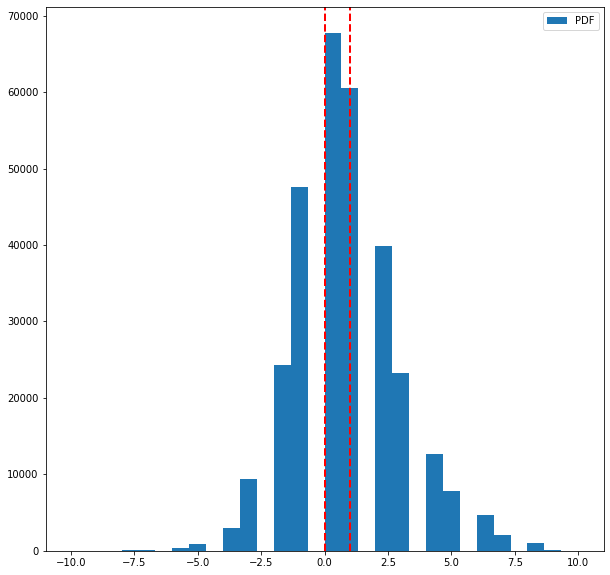

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_vil_dist_2['Change_in_ADI_2001_2011'], bins=30)
plt.hist(df_vil_dist_2['Change_in_ADI_2001_2011'], bins=30,label='PDF')
plt.axvline(0.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(1.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

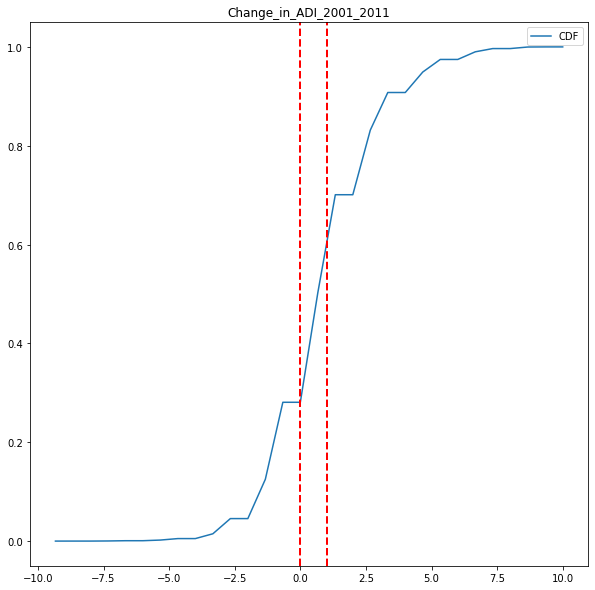

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,10))
plt.plot(bins_count[1:], cdf, label="CDF")
plt.axvline(0.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(1.0, color='red', linestyle='dashed', linewidth=2)
plt.title('Change_in_ADI_2001_2011')
plt.legend()
plt.show()

#### Positive Plot

In [ ]:
df_vil_dist_2_filter = df_vil_dist_2[df_vil_dist_2['Change_in_ADI_2001_2011'] > 0]

In [ ]:
test_data,bin_div = pd.qcut(df_vil_dist_2_filter['Change_in_ADI_2001_2011'], q=3,duplicates='drop',retbins=True)

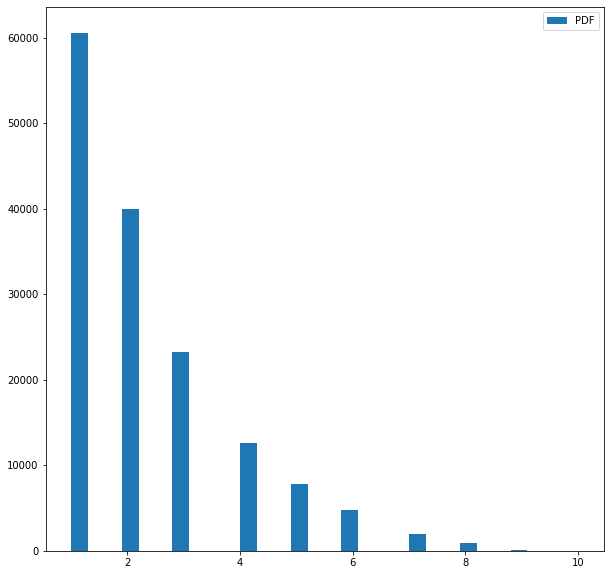

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_vil_dist_2_filter['Change_in_ADI_2001_2011'], bins=30)
plt.hist(df_vil_dist_2_filter['Change_in_ADI_2001_2011'], bins=30,label='PDF')
#plt.axvline(3.0, color='red', linestyle='dashed', linewidth=2)
#plt.axvline(10.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

[(1.0, 0.3986190736340479), (1.3, 0.3986190736340479), (1.6, 0.3986190736340479), (1.9, 0.66141633810975), (2.2, 0.66141633810975), (2.5, 0.66141633810975), (2.8, 0.8144898536797277), (3.1, 0.8144898536797277), (3.4, 0.8144898536797277), (3.6999999999999997, 0.8144898536797277), (4.0, 0.8978127653412493), (4.3, 0.8978127653412493), (4.6, 0.8978127653412493), (4.9, 0.9489886590270327), (5.2, 0.9489886590270327), (5.5, 0.9489886590270327), (5.8, 0.98003646488116), (6.1, 0.98003646488116), (6.3999999999999995, 0.98003646488116), (6.7, 0.98003646488116), (7.0, 0.9932401745575178), (7.3, 0.9932401745575178), (7.6, 0.9932401745575178), (7.8999999999999995, 0.999558998729653), (8.2, 0.999558998729653), (8.5, 0.999558998729653), (8.8, 0.9999670894574367), (9.1, 0.9999670894574367), (9.4, 0.9999670894574367), (9.7, 0.9999999999999999)]


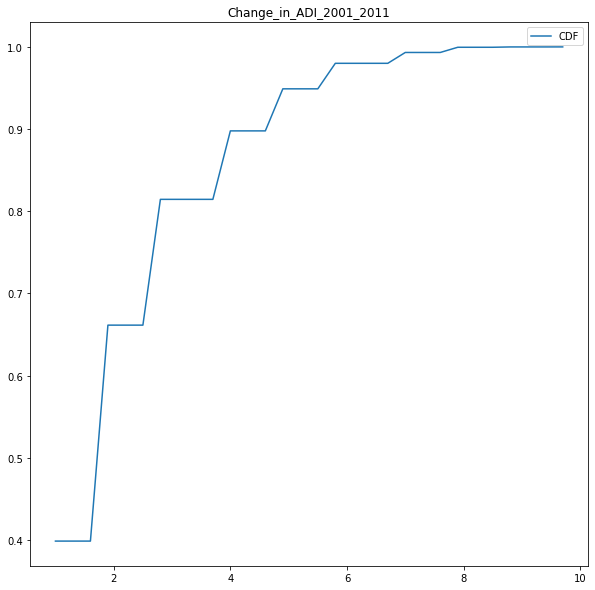

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
print(list(zip(bins_count,cdf)))
plt.figure(figsize=(10,10))
plt.plot(bins_count[:-1], cdf, label="CDF")
#plt.axvline(0.0, color='red', linestyle='dashed', linewidth=2)
#plt.axvline(1.0, color='red', linestyle='dashed', linewidth=2)
plt.title('Change_in_ADI_2001_2011')
plt.legend()
plt.show()

### 2011-2019

#### General Plot

In [ ]:
test_data,bin_div = pd.qcut(df_vil_dist_3['Change_in_ADI_2011_2019'], q=3,duplicates='drop',retbins=True)

In [ ]:
bin_div

array([-10.,  -1.,   1.,  10.])

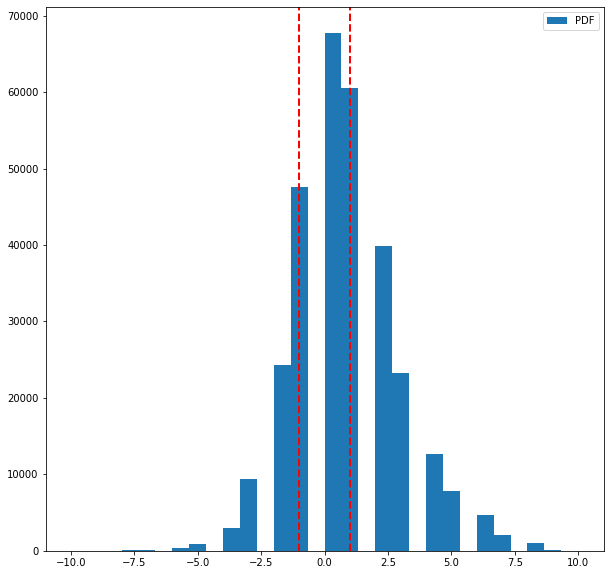

In [ ]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_vil_dist_3['Change_in_ADI_2011_2019'], bins=30)
plt.hist(df_vil_dist_2['Change_in_ADI_2001_2011'], bins=30,label='PDF')
plt.axvline(-1.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(1.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

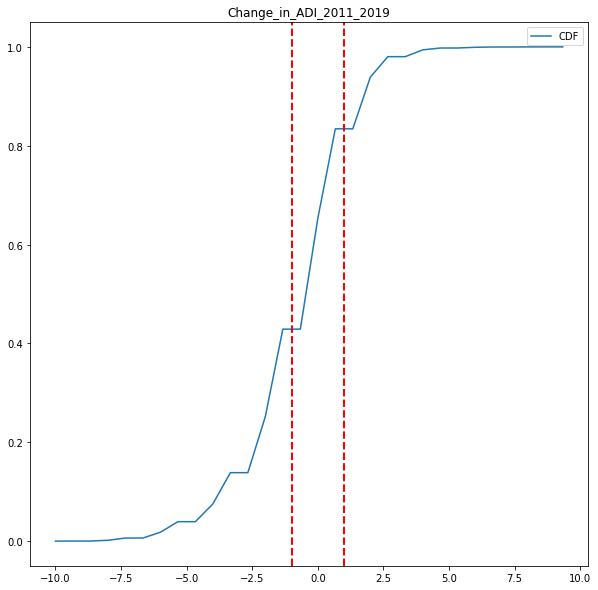

In [ ]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,10))
plt.plot(bins_count[:-1], cdf, label="CDF")
plt.axvline(-1.0, color='red', linestyle='dashed', linewidth=2)
plt.axvline(1.0, color='red', linestyle='dashed', linewidth=2)
plt.title('Change_in_ADI_2011_2019')
plt.legend()
plt.show()

#### Postive Plot

In [37]:
df_vil_dist_3_filter = df_vil_dist_3[df_vil_dist_3['Change_in_ADI_2011_2019'] > 0]

In [38]:
test_data,bin_div = pd.qcut(df_vil_dist_3_filter['Change_in_ADI_2011_2019'], q=3,duplicates='drop',retbins=True)

In [39]:
bin_div

array([ 1.,  2., 10.])

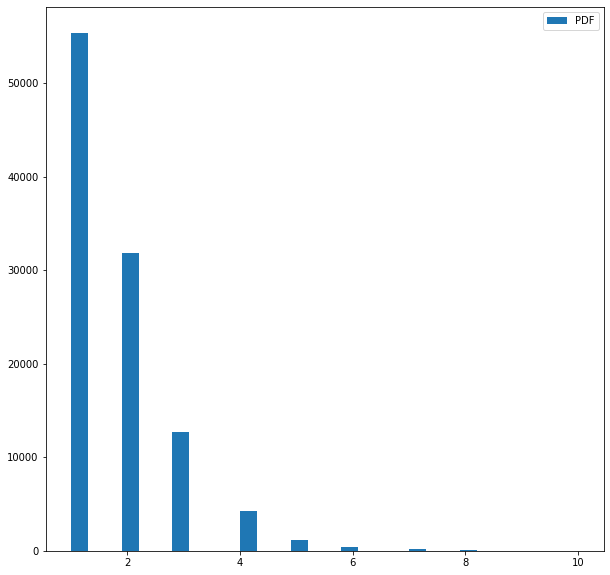

In [41]:
plt.figure(figsize=(10,10))
count, bins_count = np.histogram(df_vil_dist_3_filter['Change_in_ADI_2011_2019'], bins=30)
plt.hist(df_vil_dist_3_filter['Change_in_ADI_2011_2019'], bins=30,label='PDF')
#plt.axvline(-1.0, color='red', linestyle='dashed', linewidth=2)
#plt.axvline(1.0, color='red', linestyle='dashed', linewidth=2)
plt.legend()
plt.show()

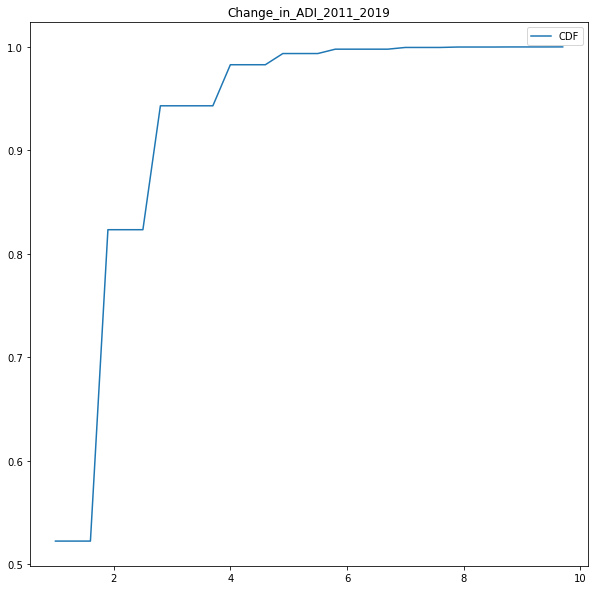

In [43]:
pdf = count / sum(count)
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,10))
plt.plot(bins_count[:-1], cdf, label="CDF")
#plt.axvline(-1.0, color='red', linestyle='dashed', linewidth=2)
#plt.axvline(1.0, color='red', linestyle='dashed', linewidth=2)
plt.title('Change_in_ADI_2011_2019')
plt.legend()
plt.show()